In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot 

**Two columns in dataset are Reviews and Liked**

In [2]:
dataset = pd.read_csv(r'C:\Users\Abishek Ravi\Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
#cleaning the text
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

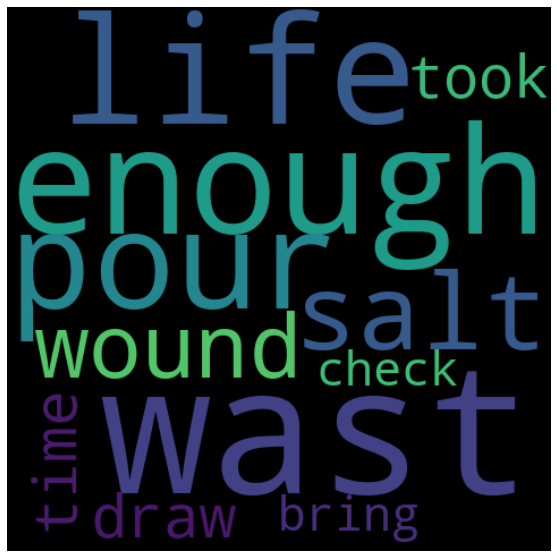

In [4]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
wc = WordCloud(width=480, height=480, margin=0).generate(review) 
plt.figure(figsize = (12, 10)) 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.imshow(wc,interpolation='bilinear') 
plt.show()

**Bag of words is created using the CountVectorizer which converts the words in the dataset into 0 and 1**

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).todense()
y = dataset.iloc[:,1].values

In [6]:
#splitting the dataset into the training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.30, random_state = 0)

In [7]:
#fitting the naive bayes model to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
#predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0
 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1
 0 0 1 1]


In [11]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Accuracy_Score = accuracy_score(y_test, y_pred)
print(Confusion_Matrix)


[[ 83  60]
 [ 26 131]]


Accuracy Score is : 0.7133333333333334


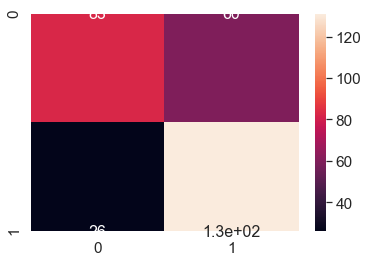

In [12]:
#visualizing the results
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
      
df_cm = pd.DataFrame(Confusion_Matrix, range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
print("Accuracy Score is :", Accuracy_Score)